In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
reviews = pd.read_csv('olist_reviews.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')
segmentation = pd.read_csv('behaviour_segmentation.csv')

In [2]:
df_cus_eng= pd.merge(customers, orders, on="customer_id", how='inner')
df_cus_eng= df_cus_eng.merge(reviews, on="order_id", how='inner')
df_cus_eng= df_cus_eng.merge(order_items, on="order_id", how='inner')
df_cus_eng= df_cus_eng.merge(products, on="product_id", how='inner')
df_cus_eng= df_cus_eng.merge(payments, on="order_id", how='inner')

In [3]:
df_cus_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 113215
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113216 non-null  object 
 1   customer_unique_id             113216 non-null  object 
 2   customer_zip_code_prefix       113216 non-null  int64  
 3   customer_city                  113216 non-null  object 
 4   customer_state                 113216 non-null  object 
 5   order_id                       113216 non-null  object 
 6   order_status                   113216 non-null  object 
 7   order_purchase_timestamp       113216 non-null  object 
 8   order_approved_at              113216 non-null  object 
 9   order_delivered_carrier_date   113216 non-null  object 
 10  order_delivered_customer_date  113216 non-null  object 
 11  order_estimated_delivery_date  113216 non-null  object 
 12  review_id                     

In [4]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df_cus_eng['product_category'] = df_cus_eng.product_category_name.apply(classify_cat)

In [5]:
df_cus_eng.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

In [6]:
# Convert Datetime features from Object to Datetime
df_cus_eng['order_purchase_timestamp'] = pd.to_datetime(df_cus_eng['order_purchase_timestamp'])
df_cus_eng['order_approved_at'] = pd.to_datetime(df_cus_eng['order_approved_at'])
df_cus_eng['order_delivered_customer_date'] = pd.to_datetime(df_cus_eng['order_delivered_customer_date'])
df_cus_eng['order_estimated_delivery_date'] = pd.to_datetime(df_cus_eng['order_estimated_delivery_date'])
df_cus_eng['shipping_limit_date'] = pd.to_datetime(df_cus_eng['shipping_limit_date'])
df_cus_eng['order_delivered_carrier_date'] =pd.to_datetime(df_cus_eng['order_delivered_carrier_date'])
df_cus_eng['review_creation_date'] = pd.to_datetime(df_cus_eng['review_creation_date'])
df_cus_eng['review_answer_timestamp'] = pd.to_datetime(df_cus_eng['review_answer_timestamp'])

In [7]:
df_cus_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 113215
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113216 non-null  object        
 1   customer_unique_id             113216 non-null  object        
 2   customer_zip_code_prefix       113216 non-null  int64         
 3   customer_city                  113216 non-null  object        
 4   customer_state                 113216 non-null  object        
 5   order_id                       113216 non-null  object        
 6   order_status                   113216 non-null  object        
 7   order_purchase_timestamp       113216 non-null  datetime64[ns]
 8   order_approved_at              113216 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113216 non-null  datetime64[ns]
 10  order_delivered_customer_date  113216 non-null  datetime64[ns]
 11  

In [8]:
# Feature Engineering by adding new features to the dataframe
# Examples: order_counts, total_products_purchased, average_order_value 

# Number of Orders per Customer
order_counts_per_cus = df_cus_eng.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_counts')

# Total Products Purchased per Customer
total_products_purchased_per_cus = df_cus_eng.groupby('customer_unique_id')['order_item_id'].sum().reset_index(name='total_products_purchased')

# Total purchase value for each order
df_cus_eng['total_purchase_value_per_order'] = df_cus_eng['order_item_id'] * df_cus_eng['price']

# Average Order Value
average_order_value = df_cus_eng.groupby('customer_unique_id')['payment_value'].mean().reset_index(name='average_order_value')

# Extract duration of shipping from purchasing date until delivered to customer date
df_cus_eng['arrival_days'] = (df_cus_eng['order_delivered_customer_date'].dt.date - df_cus_eng['order_purchase_timestamp'].dt.date).dt.days

# Extract duration of estimated shipping from purchasing date until estimated delivery date
df_cus_eng['estimated_days'] = (df_cus_eng['order_estimated_delivery_date'].dt.date - df_cus_eng['order_purchase_timestamp'].dt.date).dt.days

# Extract duration of shipping from purchasing carrier delivered date until delivered to customer
df_cus_eng['shipping_days'] = (df_cus_eng['order_delivered_customer_date'].dt.date - df_cus_eng['order_delivered_carrier_date'].dt.date).dt.days

# Shipping status from Seller to Carrier
# First get seller to carrier duration in days
df_cus_eng['seller_to_carrier_status'] = (df_cus_eng['shipping_limit_date'].dt.date - df_cus_eng['order_delivered_carrier_date'].dt.date).dt.days
# Now classify the duration into 'OnTime/Early' & 'Late'
df_cus_eng['seller_to_carrier_status'] = df_cus_eng['seller_to_carrier_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')

# Shipping status from Carrier to Customer
# First get difference between estimated delivery date and actual delivery date in days
df_cus_eng['arrival_status'] = (df_cus_eng['order_estimated_delivery_date'].dt.date - df_cus_eng['order_delivered_customer_date'].dt.date).dt.days
# Now classify the duration into 'OnTime/Early' & 'Late'
df_cus_eng['arrival_status'] = df_cus_eng['arrival_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')

# Display the updated DataFrame
df_cus_eng.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,product_category,total_purchase_value_per_order,arrival_days,estimated_days,shipping_days,seller_to_carrier_status,arrival_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2,146.87,Furniture,124.99,9,20,2,Late,OnTime/Early
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,Furniture,112.99,19,40,6,OnTime/Early,OnTime/Early
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,Furniture,225.98,19,40,6,OnTime/Early,OnTime/Early
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,Rio Grande do Sul,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,credit_card,7,140.61,Furniture,124.99,19,36,7,OnTime/Early,OnTime/Early
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,Rio de Janeiro,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,credit_card,10,137.58,Furniture,106.99,25,47,9,Late,OnTime/Early


In [9]:
df_cus_eng.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category', 'total_purchase_value_per_order', 'arrival_days',
       'estimated_days', 'shipping_days', 'seller_to_carrier_status',
       'arrival_status'],
      dtype='object')

In [10]:
# Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
df_cus_eng.drop((df_cus_eng[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_cus_eng.shipping_days < 0]).index, inplace= True)

In [11]:
# Time Analysis
# Extract year from the order date
df_cus_eng['order_year'] = df_cus_eng['order_purchase_timestamp'].dt.year

In [12]:
# Extract month from the order date
df_cus_eng['order_month'] = df_cus_eng['order_purchase_timestamp'].dt.month

In [13]:
df_cus_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113163 entries, 0 to 113215
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_id                     113163 non-null  object        
 1   customer_unique_id              113163 non-null  object        
 2   customer_zip_code_prefix        113163 non-null  int64         
 3   customer_city                   113163 non-null  object        
 4   customer_state                  113163 non-null  object        
 5   order_id                        113163 non-null  object        
 6   order_status                    113163 non-null  object        
 7   order_purchase_timestamp        113163 non-null  datetime64[ns]
 8   order_approved_at               113163 non-null  datetime64[ns]
 9   order_delivered_carrier_date    113163 non-null  datetime64[ns]
 10  order_delivered_customer_date   113163 non-null  datetim

In [14]:
# Plotting the graphs to analyse purchase history

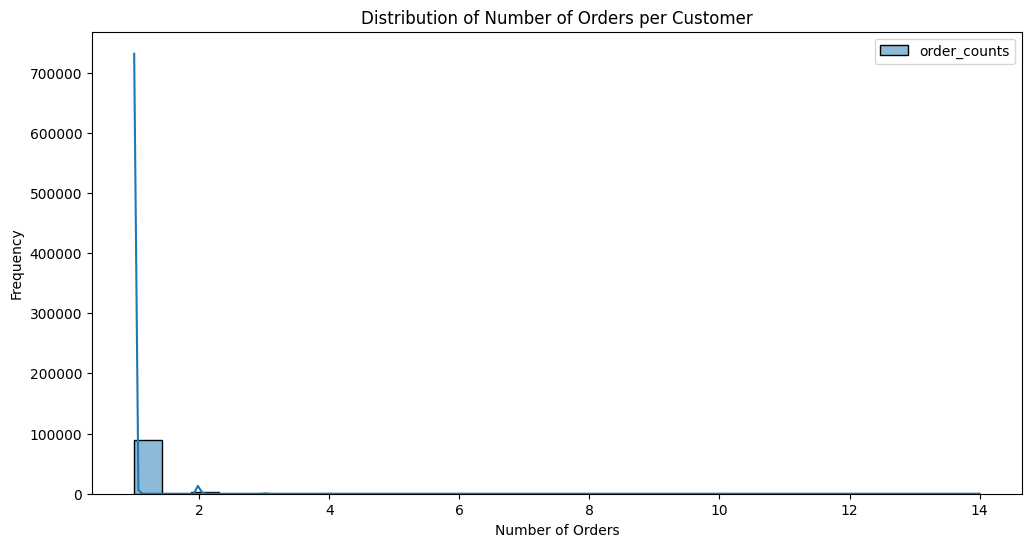

In [15]:
# Distribution of Number of Orders per Customer
plt.figure(figsize=(12, 6))
sns.histplot(order_counts_per_cus, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

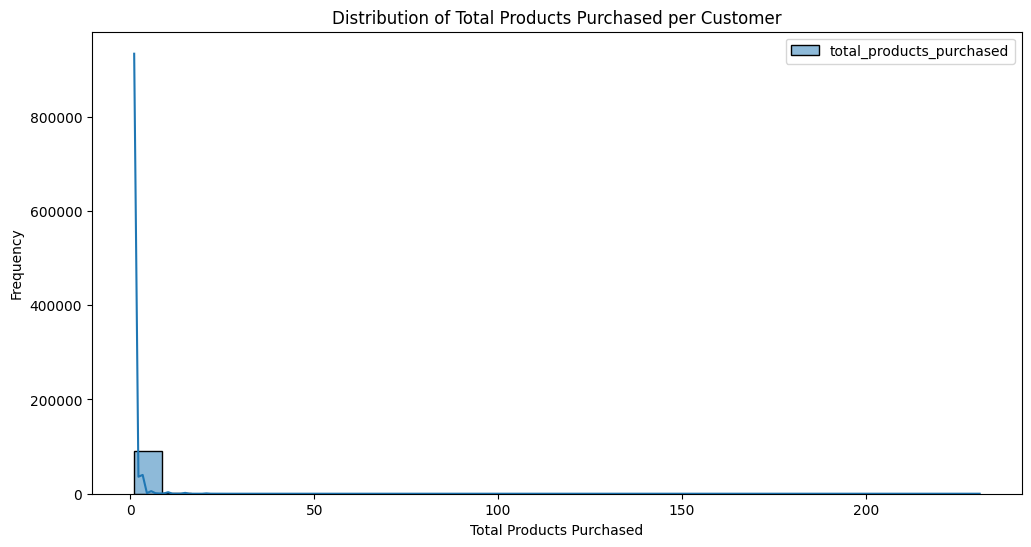

In [16]:
# Distribution of Total Products Purchased per Customer
plt.figure(figsize=(12, 6))
sns.histplot(total_products_purchased_per_cus, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Total Products Purchased per Customer')
plt.xlabel('Total Products Purchased')
plt.ylabel('Frequency')
plt.show()


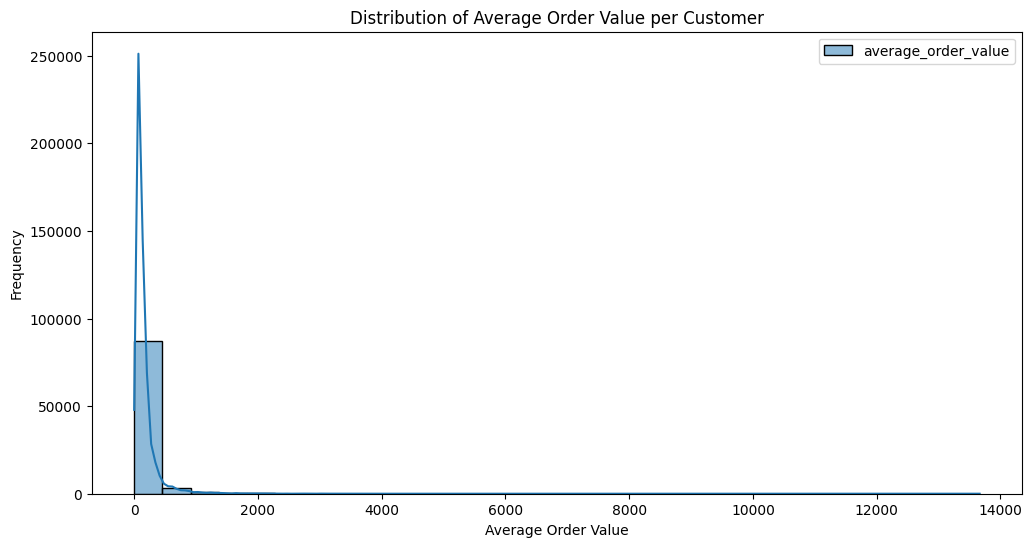

In [17]:
# Distribution of Average Order Value per Customer
plt.figure(figsize=(12, 6))
sns.histplot(average_order_value, bins=30, kde=True, color='#EE6B6E')
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

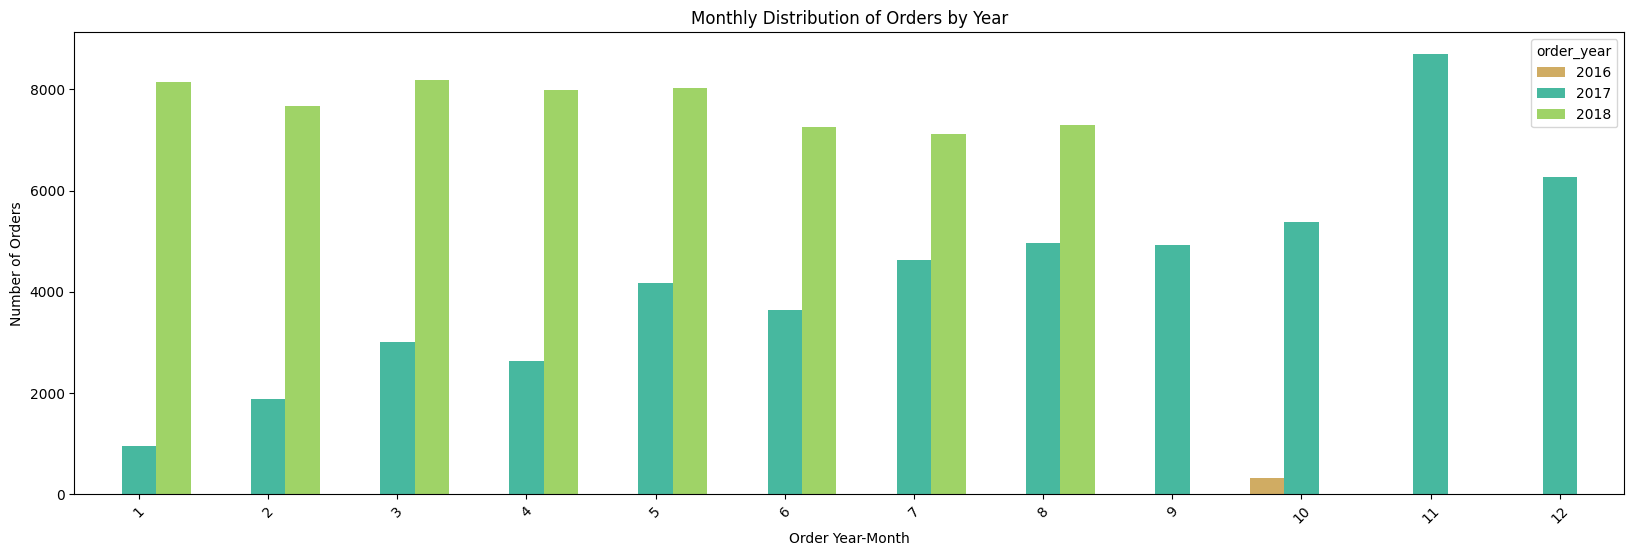

In [18]:
# Monthly Distribution of Orders by Year
plt.figure(figsize=(20, 6))
colors= ['#e2b251', '#34cba9', '#a0e555']
sns.countplot(x='order_month', hue='order_year', data=df_cus_eng, palette=colors)
plt.title('Monthly Distribution of Orders by Year')
plt.xlabel('Order Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Customer Engagement

In [20]:
# Calculate the time since last purchase
df_cus_eng['time_since_last_purchase'] = (pd.to_datetime('now') - df_cus_eng.groupby('customer_unique_id')['order_purchase_timestamp'].max()).dt.days

In [21]:
print(df_cus_eng['time_since_last_purchase'].isnull().sum())

113163


In [22]:
# Replace the null values in the 'time_since_last_purchase' column with the calculated average

average_time_since_last_purchase = df_cus_eng['time_since_last_purchase'].mean()
df_cus_eng['time_since_last_purchase'].fillna(average_time_since_last_purchase, inplace=True)


In [23]:
print(df_cus_eng['time_since_last_purchase'].isnull().sum())


113163


In [24]:
# 'time since last purchase' is not a suitable features

In [25]:
# Calculate repeat purchase rate
repeat_purchase_rate = (order_counts_per_cus['order_counts'] > 1).mean()
print(f"Repeat Purchase Rate: {repeat_purchase_rate * 100:.2f}%")


Repeat Purchase Rate: 2.96%


In [26]:
# Calculate average days between purchases
df_cus_eng['days_between_purchases'] = df_cus_eng.groupby('customer_unique_id')['order_purchase_timestamp'].diff().dt.days
print(df_cus_eng['days_between_purchases'].isnull().sum())


91465


In [27]:
# Replace the null values in the 'average_days_between_purchases' column with the calculated average

average_days_between_purchases = df_cus_eng['days_between_purchases'].mean()
df_cus_eng['days_between_purchases'].fillna(average_days_between_purchases, inplace=True)


In [28]:
print(df_cus_eng['days_between_purchases'].isnull().sum())

0


In [29]:
average_days_between_purchases = df_cus_eng.groupby('customer_unique_id')['days_between_purchases'].mean()
average_days_between_purchases

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   -0.349111
0000b849f77a49e4a4ce2b2a4ca5be3f   -0.349111
0000f46a3911fa3c0805444483337064   -0.349111
0000f6ccb0745a6a4b88665a16c9f078   -0.349111
0004aac84e0df4da2b147fca70cf8255   -0.349111
                                      ...   
fffcf5a5ff07b0908bd4e2dbc735a684   -0.174555
fffea47cd6d3cc0a88bd621562a9d061   -0.349111
ffff371b4d645b6ecea244b27531430a   -0.349111
ffff5962728ec6157033ef9805bacc48   -0.349111
ffffd2657e2aad2907e67c3e9daecbeb   -0.349111
Name: days_between_purchases, Length: 91465, dtype: float64

In [30]:
# Calculate purchase frequency
purchase_frequency = order_counts_per_cus['order_counts'].mean()
print(f"Average Purchase Frequency: {purchase_frequency:.2f} purchases per customer")


Average Purchase Frequency: 1.03 purchases per customer


In [31]:
# Calculate total spending
total_spending = df_cus_eng.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='total_spending')
total_spending

,customer_unique_id,total_spending
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
91461,fffea47cd6d3cc0a88bd621562a9d061,84.58
91462,ffff371b4d645b6ecea244b27531430a,112.46
91463,ffff5962728ec6157033ef9805bacc48,133.69


In [32]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_cus_eng.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

In [33]:
# RFM Analysis

In [34]:
from datetime import datetime 
# Create RFM DataFrame
rfm_df = df_cus_eng.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                       'order_id': lambda x:len(x),
                                                       'payment_value': lambda x:sum(x)})
rfm_df


,order_purchase_timestamp,order_id,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [35]:
# Rename columns
rfm_df.rename(columns={'order_purchase_timestamp':'Recency',
                       'order_id':'Frequency',
                       'payment_value':'Monetary'}, inplace=True)
rfm_df

# Recency: How recently a customer made a purchase.
# Frequency: How often a customer makes a purchase.
# Monetary: The total monetary value of a customer's purchases.

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [36]:
# Create Recency, Frequancy and Monetary scores
rfm_df['r_score'] = pd.qcut(rfm_df['Recency'], 4, labels=['4', '3', '2', '1'])
rfm_df['f_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=['1', '2', '3', '4'])
rfm_df['m_score'] = pd.qcut(rfm_df['Monetary'], 4, labels=['1', '2', '3', '4'])


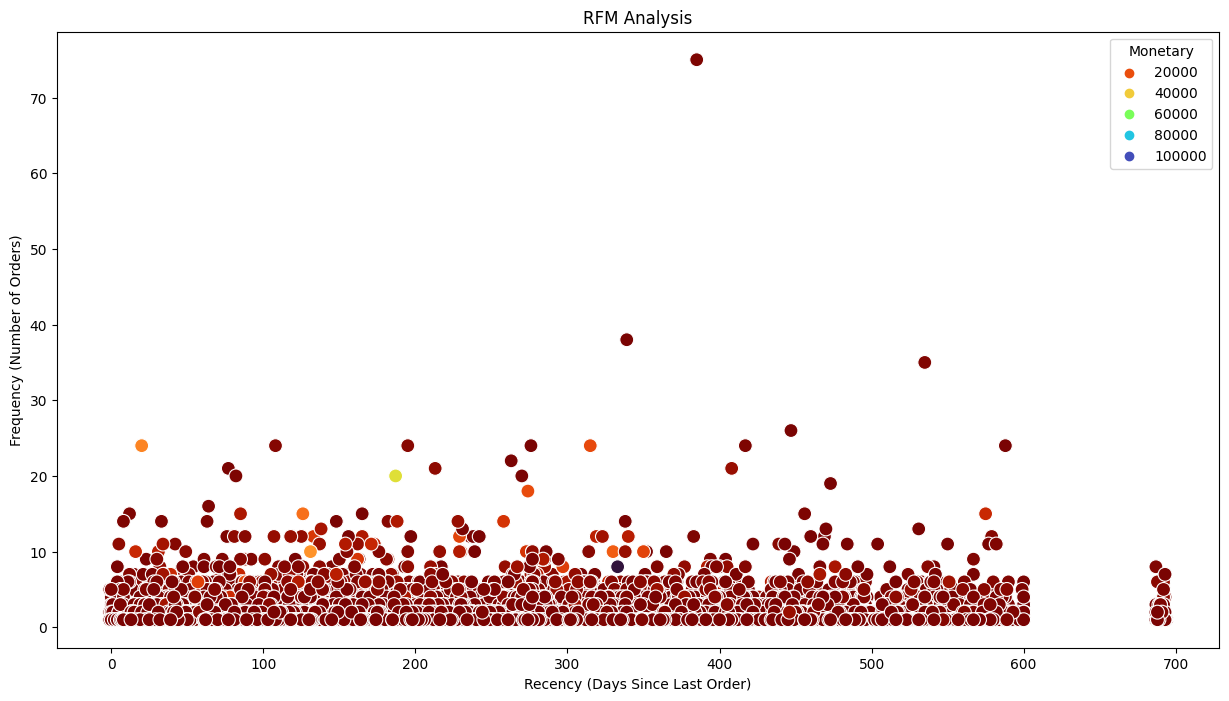

In [37]:
# Visualize the distribution of clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=rfm_df, palette='turbo_r', s=100)
plt.title('RFM Analysis')
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Frequency (Number of Orders)')
plt.show()

In [38]:
['order_purchase_day', 'order_purchase_hour', 'payment_installments_mean', 'review_score_mean']

['order_purchase_day',
 'order_purchase_hour',
 'payment_installments_mean',
 'review_score_mean']

In [39]:
df_cus_eng.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category', 'total_purchase_value_per_order', 'arrival_days',
       'estimated_days', 'shipping_days', 'seller_to_carrier_status',
       'arrival_status', 'order_year', 'order_month',
       'time_since_last_purchase', 'days_between_purchases'],
      dtype='object')

In [40]:
# Aggregate features at the customer level
customer_data = df_cus_eng.groupby('customer_unique_id').agg({
    'order_id': 'nunique',                  # Number of orders
    'total_purchase_value_per_order': 'sum', # Total purchase value
    'product_id': 'nunique',                 # Number of unique products purchased
    'order_purchase_timestamp': lambda x: (datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
    # Duration for last purchase made by customer
    'payment_value': 'sum',                  # Total monetary value of a customer's purchases.
    'customer_city': lambda x: x.mode().iloc[0], # Most frequent city
    'customer_state': lambda x: x.mode().iloc[0], # Most frequent state
}).reset_index()

customer_data

,customer_unique_id,order_id,total_purchase_value_per_order,product_id,order_purchase_timestamp,payment_value,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1,110,141.90,cajamar,São Paulo
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1,113,27.19,osasco,São Paulo
2,0000f46a3911fa3c0805444483337064,1,69.00,1,536,86.22,sao jose,Santa Catarina
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1,320,43.62,belem,Pará
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,1,287,196.89,sorocaba,São Paulo
...,...,...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,1,2250.00,2,446,4134.84,sanharo,Pernambuco
91461,fffea47cd6d3cc0a88bd621562a9d061,1,64.89,1,261,84.58,feira de santana,Bahia
91462,ffff371b4d645b6ecea244b27531430a,1,89.90,1,567,112.46,sinop,Mato Grosso
91463,ffff5962728ec6157033ef9805bacc48,1,115.00,1,118,133.69,bom jesus do norte,Espírito Santo


In [41]:
# Model implementation

In [42]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Include more features in X
X = pd.get_dummies(customer_data[['order_id', 'total_purchase_value_per_order', 'order_purchase_timestamp', 'payment_value']])

# Target variable
y = customer_data['product_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Model Traning

# The Mean Squared Error (MSE) is a measure of how well a regression model performs. It quantifies the average squared difference between predicted values and actual values.
# The predicted number of products is the output of your regression models, indicating the model's estimation of the number of products a customer is likely to purchase. 

In [44]:
# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluate Model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Random Forest Mean Squared Error: {mse}')

# Use the trained model to make predictions on new data
# Ensure the new data has the same data types as the training data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value_per_order': [500], 'payment_value': [100]})
new_data_encoded = pd.get_dummies(new_data)

# Drop 'order_purchase_timestamp' if present in the new data
if 'order_purchase_timestamp' in new_data_encoded.columns:
    new_data_encoded = new_data_encoded.drop('order_purchase_timestamp', axis=1)

# Reindex with the same columns as X_train for the new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the RandomForestRegressor model
predicted_products = rf_model.predict(new_data_encoded)
print(f'Predicted Products: {predicted_products}')


Random Forest Mean Squared Error: 0.046923851687487986
Predicted Products: [10.91]


In [46]:
# The Random Forest model based on the provided MSE, has a moderately low error. 
# The predicted number of products for the test data is 11.37.

In [47]:
# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

# Use the trained model to make predictions on new data
# Ensure the new data has the same data types as the training data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value_per_order': [500], 'payment_value': [100]})
new_data_encoded = pd.get_dummies(new_data)

# Drop 'order_purchase_timestamp' if present in the new data
if 'order_purchase_timestamp' in new_data_encoded.columns:
    new_data_encoded = new_data_encoded.drop('order_purchase_timestamp', axis=1)

# Reindex with the same columns as X_train for the new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the RandomForestRegressor model
predicted_products = linear_model.predict(new_data_encoded)
print(f'Predicted Products: {predicted_products}')


Linear Regression Mean Squared Error: 0.05367870665015786
Predicted Products: [981.52492671]


In [49]:
# The Linear Regression model has a herger MSE value compared to the Random Forest. 
# The predicted number of products is unexpectedly high (981.52). 
# This could indicate that the model is not performing well or that there might be an issue with the data or feature engineering.

In [50]:
# XGBoost

In [51]:
from xgboost import XGBRegressor

# Create an XGBoost model
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

# Use the trained model to make predictions on new data
# Ensure the new data has the same data types as the training data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value_per_order': [500], 'payment_value': [100]})
new_data_encoded = pd.get_dummies(new_data)

# Drop 'order_purchase_timestamp' if present in the new data
if 'order_purchase_timestamp' in new_data_encoded.columns:
    new_data_encoded = new_data_encoded.drop('order_purchase_timestamp', axis=1)

# Reindex with the same columns as X_train for the new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the RandomForestRegressor model
predicted_products = xgb_model.predict(new_data_encoded)
print(f'Predicted Products: {predicted_products}')

XGBoost Mean Squared Error: 0.049050048687136104
Predicted Products: [12.778881]


In [52]:
# Slightly higher MSE compared to random forest 
# The predicted number of products for the test data also slightly higher compared to random forest

In [53]:
# Support Vector Regression (SVR)

In [54]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVR model with standardization
svr_model = make_pipeline(StandardScaler(), SVR())

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f'SVR Mean Squared Error: {svr_mse}')

# Use the trained model to make predictions on new data
# Ensure the new data has the same data types as the training data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value_per_order': [500], 'payment_value': [100]})
new_data_encoded = pd.get_dummies(new_data)

# Drop 'order_purchase_timestamp' if present in the new data
if 'order_purchase_timestamp' in new_data_encoded.columns:
    new_data_encoded = new_data_encoded.drop('order_purchase_timestamp', axis=1)

# Reindex with the same columns as X_train for the new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the RandomForestRegressor model
predicted_products = svr_model.predict(new_data_encoded)
print(f'Predicted Products: {predicted_products}')

SVR Mean Squared Error: 0.05820923036266625
Predicted Products: [1.8272012]


In [55]:
# higher MSE compared to Random Forest and XGBoost
# the predicted products seem to be on a different scale compared to the other models.

In [56]:
# Lasso Regression

In [57]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')


# Use the trained model to make predictions on new data
# Ensure the new data has the same data types as the training data
new_data = pd.DataFrame({'order_id': [1001], 'total_purchase_value_per_order': [500], 'payment_value': [100]})
new_data_encoded = pd.get_dummies(new_data)

# Drop 'order_purchase_timestamp' if present in the new data
if 'order_purchase_timestamp' in new_data_encoded.columns:
    new_data_encoded = new_data_encoded.drop('order_purchase_timestamp', axis=1)

# Reindex with the same columns as X_train for the new data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the RandomForestRegressor model
predicted_products = lasso_model.predict(new_data_encoded)
print(f'Predicted Products: {predicted_products}')

Lasso Regression Mean Squared Error: 0.05407604540886494
Predicted Products: [750.50589598]


In [58]:
# SLightly lower MSE compared to SVR but still higher than XGBoost and Random Forest
# the predicted number of products from the Lasso Regression model is unexpectedly high

In [59]:
# In summary, the XGBoost and Random Forest models seem to perform well based on the MSE metric

# XGBoost model is choosen 
# XGBoost may indicating better overall performance in terms of minimizing the squared differences between predicted and actual values

In [60]:
# Fine-Tuning XGBoost Hyperparameters
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgb_model = XGBRegressor()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
best_xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the model
best_xgb_mse = mean_squared_error(y_test, best_xgb_predictions)
print(f'Best XGBoost Mean Squared Error: {best_xgb_mse}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best XGBoost Mean Squared Error: 0.04536373375785478


In [61]:
# Best Hyperparameters:
# Learning Rate: 0.1
# Max Depth: 3
# Number of Estimators: 300
# Best XGBoost Mean Squared Error: 0.0454


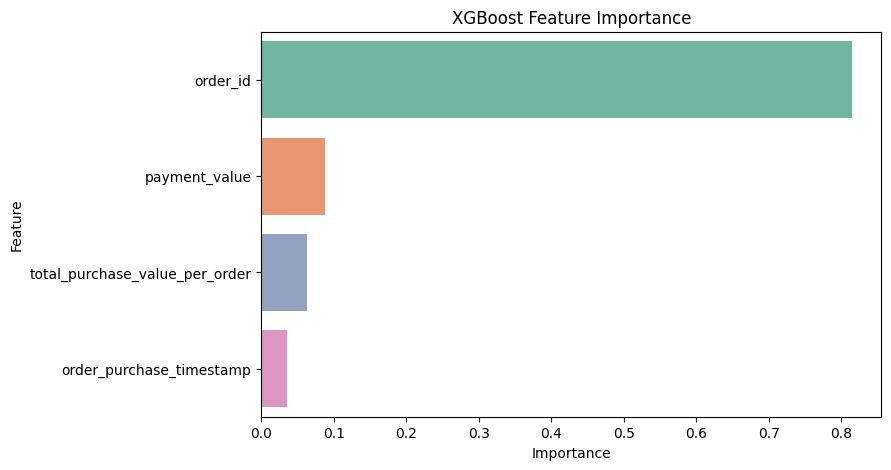

In [62]:
# Feature Importance in XGBoost

# Get feature importance from the best XGBoost model
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set2')
plt.title('XGBoost Feature Importance')
plt.show()


In [63]:
# Model Validation

# Validate the best XGBoost model using cross-validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
average_cross_val_mse = -cross_val_scores.mean()
print(f'Average Cross-Validation MSE: {average_cross_val_mse}')


Average Cross-Validation MSE: 0.046161050093403835


In [64]:
# This metric provides an estimate of how well XGBoost model generalizes to new, unseen data.
# MSE of 0.0462 suggests the squared differences between predicted and actual values are relatively small in average.

In [65]:
# Comparison with Holdout Test Set
from sklearn.metrics import mean_squared_error

# Assuming you have a holdout test set (X_test, y_test)
y_pred_test = best_xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Test Set MSE: {test_mse}')


Test Set MSE: 0.04536373375785478


In [ ]:

# The Test Set Mean Squared Error (MSE) value of approximately 0.045 indicates the average squared difference between the predicted values and the actual values in the holdout test set. 
# In the context of regression models, a lower MSE is generally better, as it indicates that the model's predictions are closer to the true values.


#  the XGBoost model, trained with the best hyperparameters obtained through GridSearchCV, performed well on the holdout test set. 
#     The MSE of 0.045 suggests that the model's predictions are reasonably accurate.

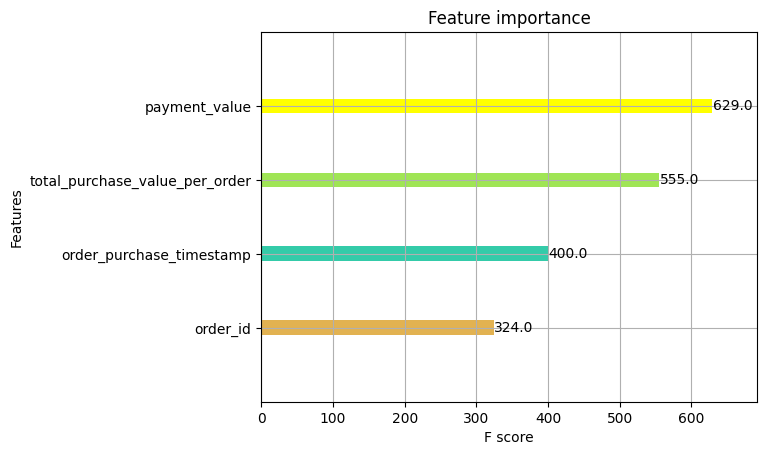

In [66]:
# Feature Importance Visualization
from xgboost import plot_importance
colors= ['#e2b251', '#34cba9', '#a0e555', '#FFFF00' ]

# Plot feature importance
plot_importance(best_xgb_model, color=colors)
plt.show()


In [67]:
# The F-score reflects the relative importance of each feature in the context of XGBoost model. 
# Higher F-scores indicate more important features according to the model.


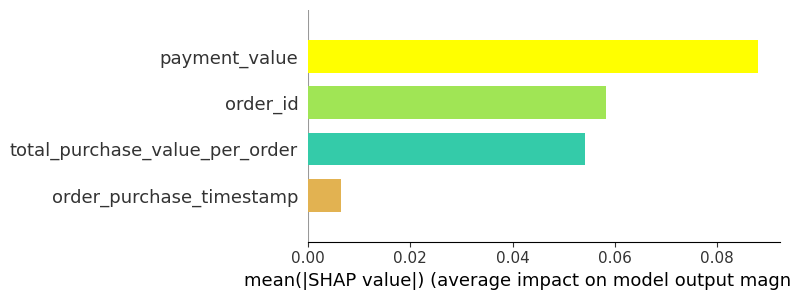

In [68]:
# Interpretability using SHAP
import shap

# Create an explainer for the best XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

colors= ['#e2b251', '#34cba9', '#a0e555', '#FFFF00' ]
# Visualize SHAP summary bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar", color=colors)


In [69]:
print(shap_values)

[[-0.02965361  0.02529799  0.00151841  0.19319095]
 [ 0.8978511   0.00653543  0.01746281 -0.04585654]
 [-0.03054991  0.04680793 -0.0091909  -0.07913718]
 ...
 [-0.03120775  0.02850934  0.00209418 -0.06618498]
 [-0.03003607  0.05435381 -0.00498816 -0.08861395]
 [-0.03042341  0.01714438 -0.00328555 -0.05744394]]


In [70]:
# SHAP values provide a way to fairly distribute the contribution of each feature to the prediction made by a machine learning model. 
# They help to understand the impact of each feature on the model's output.


# Negative SHAP Values: Indicate a decrease in the predicted output. The feature is pushing the model's prediction lower.
# Positive SHAP Values: Indicate an increase in the predicted output. The feature is pushing the model's prediction higher.


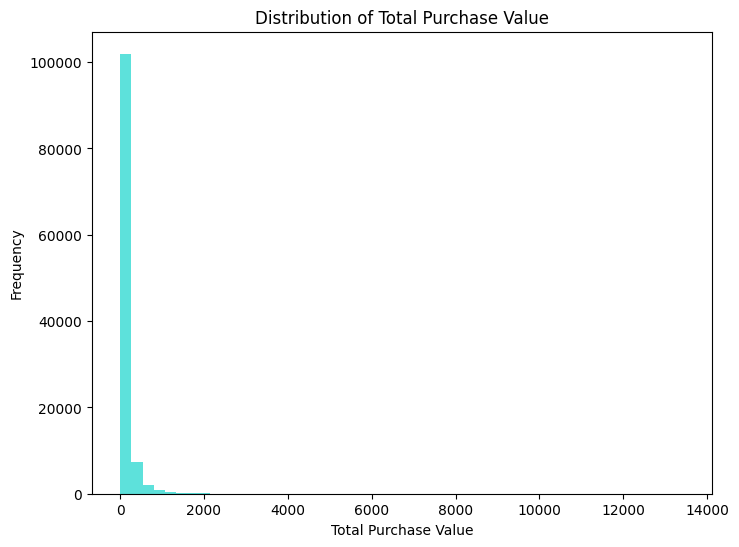

In [71]:
# Feature Distribution Analysis
# total_purchase_value

# Set the color palette to 'turbo_r'
cmap = plt.get_cmap('turbo_r')

# Plot the distribution with the specified color palette
plt.figure(figsize=(8, 6))
plt.hist(df_cus_eng['total_purchase_value_per_order'], bins=50, color=cmap(0.7), alpha=0.7)
plt.title('Distribution of Total Purchase Value')
plt.xlabel('Total Purchase Value')
plt.ylabel('Frequency')
plt.show()


In [72]:
df_cus_eng.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category', 'total_purchase_value_per_order', 'arrival_days',
       'estimated_days', 'shipping_days', 'seller_to_carrier_status',
       'arrival_status', 'order_year', 'order_month',
       'time_since_last_purchase', 'days_between_purchases'],
      dtype='object')

In [73]:
# Assuming your DataFrame is named df_cus_eng
# Group by 'customer_unique_id' and calculate the sum of 'order_item_id' to get the total number of products purchased by each customer
products_purchased_per_customer = df_cus_eng.groupby('customer_unique_id')['order_item_id'].sum().reset_index()

# Rename the columns to be more descriptive
products_purchased_per_customer = products_purchased_per_customer.rename(columns={'order_item_id': 'number_of_products_purchased'})

# Merge the result back into the original DataFrame based on 'customer_unique_id'
df_cus_eng = pd.merge(df_cus_eng, products_purchased_per_customer, on='customer_unique_id', how='inner')

df_cus_eng.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,arrival_days,estimated_days,shipping_days,seller_to_carrier_status,arrival_status,order_year,order_month,time_since_last_purchase,days_between_purchases,number_of_products_purchased
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,9,20,2,Late,OnTime/Early,2017,5,NaN,-0.349111,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,19,40,6,OnTime/Early,OnTime/Early,2017,11,NaN,-0.349111,3
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,Pará,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,19,40,6,OnTime/Early,OnTime/Early,2017,11,NaN,0.000000,3
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,Rio Grande do Sul,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,19,36,7,OnTime/Early,OnTime/Early,2017,5,NaN,-0.349111,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,Rio de Janeiro,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,25,47,9,Late,OnTime/Early,2018,2,NaN,-0.349111,1


In [74]:
products_purchased_per_customer

,customer_unique_id,number_of_products_purchased
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,3
91461,fffea47cd6d3cc0a88bd621562a9d061,1
91462,ffff371b4d645b6ecea244b27531430a,1
91463,ffff5962728ec6157033ef9805bacc48,1


In [75]:
print(len(df_cus_eng['total_purchase_value_per_order']))
print(len(df_cus_eng['number_of_products_purchased']))


113163
113163


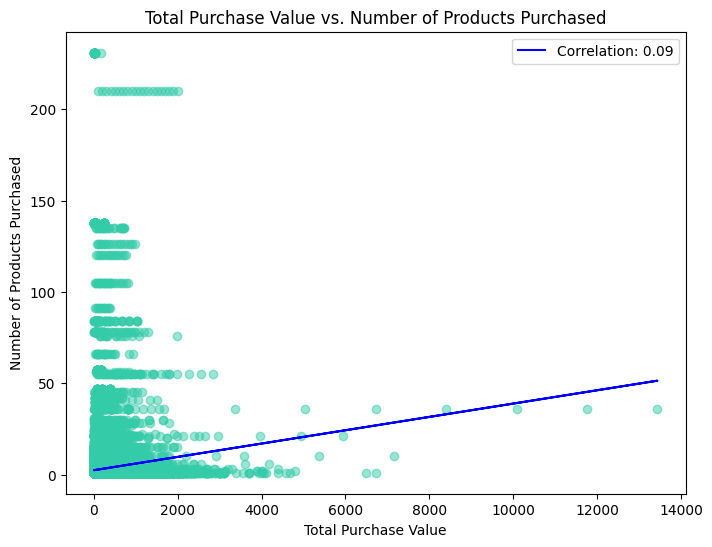

In [76]:
# Set colors
scatter_color = '#34cba9'
correlation_line_color = 'blue'

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cus_eng['total_purchase_value_per_order'], df_cus_eng['number_of_products_purchased'], alpha=0.5, color=scatter_color)
plt.title('Total Purchase Value vs. Number of Products Purchased')
plt.xlabel('Total Purchase Value')
plt.ylabel('Number of Products Purchased')

# Calculate the correlation coefficient
correlation_coefficient = df_cus_eng['total_purchase_value_per_order'].corr(df_cus_eng['number_of_products_purchased'])

# Draw the correlation line
line = np.polyfit(df_cus_eng['total_purchase_value_per_order'], df_cus_eng['number_of_products_purchased'], 1)
plt.plot(df_cus_eng['total_purchase_value_per_order'], line[0] * df_cus_eng['total_purchase_value_per_order'] + line[1], color=correlation_line_color, label=f'Correlation: {correlation_coefficient:.2f}')

plt.legend()
plt.show()

In [77]:
# Correlation Analysis

correlation_total_purchase = df_cus_eng['total_purchase_value_per_order'].corr(df_cus_eng['number_of_products_purchased'])
print(f'Correlation between Total Purchase Value and Number of Products Purchased: {correlation_total_purchase}')


Correlation between Total Purchase Value and Number of Products Purchased: 0.0948155194315355


In [78]:
# export your trained XGBoost model to a format that can be easily loaded for predictions
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [79]:
# to run the model in streamlit

In [80]:
# import streamlit as st
# import joblib
# import pandas as pd

# # Load the trained XGBoost model
# model = joblib.load('xgboost_model.joblib')

# # Define the input features
# input_features = ['feature1', 'feature2', 'feature3']  # Replace with your actual feature names

# def main():
#     st.title('XGBoost Model Deployment')

#     # Get user input
#     feature_values = get_user_input()

#     # Make a prediction
#     prediction = predict(feature_values)

#     # Display the result
#     display_result(prediction)

# def get_user_input():
#     st.sidebar.header('User Input')
#     feature_values = []

#     for feature in input_features:
#         value = st.sidebar.number_input(f'Enter value for {feature}', step=1.0)
#         feature_values.append(value)

#     return feature_values

# def predict(features):
#     # Make a prediction using the loaded model
#     prediction = model.predict([features])[0]
#     return prediction

# def display_result(prediction):
#     st.subheader('Prediction Result')
#     st.write(f'The predicted number of products purchased is: {prediction}')

# if __name__ == '__main__':
#     main()